Run on Kaggle.

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 作者统计

In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [4]:
data = []
with open("/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json", 'r') as f: 
    for idx, line in enumerate(f): 
        d = json.loads(line)
        d = {'authors': d['authors'], 'categories': d['categories'], 'authors_parsed': d['authors_parsed']}
        data.append(d)
        
data = pd.DataFrame(data)

In [5]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

Text(0.5, 0, 'Count')

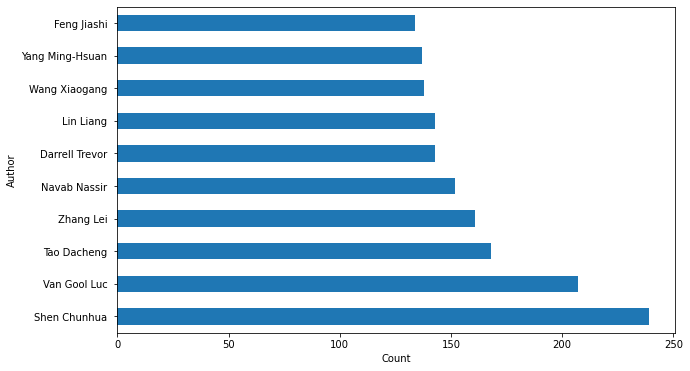

In [6]:


# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

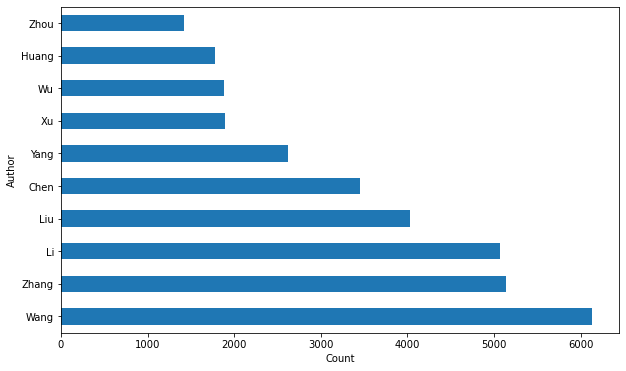

In [7]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')